In [1]:
import numpy as np
import pandas as pd
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
from dotenv import load_dotenv

In [2]:
from services import DBDataToPandasLoader
from database.handlers import DatabaseHandler

db_handler = DatabaseHandler()
db_telegram_loader = DBDataToPandasLoader(db_handler)
channels = db_telegram_loader.get_channels()

Connected to MongoDB


In [3]:
db_telegram_loader.get_messages_df_by_channel_id(channels['id'][0]).head()
most_recent_messages_split = 1
current_channel_id = channels['id'][2]

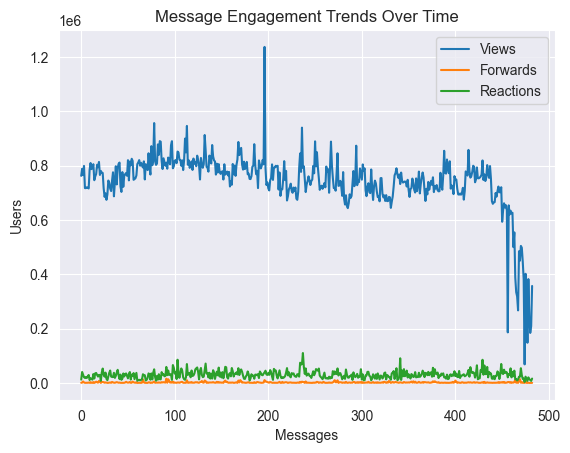

In [4]:
# Message Engagement Trends Over Time
# Dynamic variables: included_columns, is_group_by_date
messages_df = db_telegram_loader.get_messages_df_by_channel_id(current_channel_id)[:-most_recent_messages_split]
included_columns = {'views': 'Views', 'forwards': 'Forwards', 'reactions': 'Reactions'}
x = range(len(messages_df))

is_group_by_date = False

if is_group_by_date:
    messages_df = messages_df.groupby(['date'])[list(included_columns.keys())].sum().reset_index()
    x = messages_df['date']

for k, v in included_columns.items():
    sns.lineplot(x=x, y=messages_df[k], label=v)

plt.xlabel('Messages')
plt.ylabel('Users')
plt.title('Message Engagement Trends Over Time')

plt.legend()
plt.show()

In [5]:
df_melted = messages_df.melt(id_vars=['month'], value_vars=['views', 'forwards', 'reactions'], var_name='actions', value_name='users_count')
df_melted

,month,actions,users_count
0,Feb,views,761994
1,Feb,views,787948
2,Feb,views,764706
3,Feb,views,798460
4,Feb,views,716806
...,...,...,...
1444,Mar,reactions,20415
1445,Mar,reactions,14261
1446,Mar,reactions,11098
1447,Mar,reactions,7513


In [8]:
# Message Engagement Trends Over Time
# Dynamic variables: included_columns, is_group_by_date
messages_df = db_telegram_loader.get_messages_df_by_channel_id(current_channel_id)[:-most_recent_messages_split]
included_columns = {'forwards': 'Forwards', 'reactions': 'Reactions'}
x = range(len(messages_df))

messages_df = messages_df.groupby(['month', 'month_number'])[list(included_columns.keys())].sum().reset_index()
df_melted = messages_df.melt(id_vars=['month', 'month_number'], value_vars=list(included_columns.keys()), var_name='actions', value_name='users_count')

df_melted = df_melted.sort_values('month_number')
df_melted.head()
# 
# # Plotting
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_melted, y='month', x='users_count', hue='actions', palette='Set2', orient='h')
# plt.title('User actions count for each month')
# plt.ylabel('Month')
# plt.xlabel('User count')
# plt.legend(title='Variable')
# plt.tight_layout()
# plt.show()

,month,month_number,actions,users_count
0,Feb,02,forwards,741775
2,Feb,02,reactions,11623367
1,Mar,03,forwards,161685
3,Mar,03,reactions,2943838


In [5]:
messages_df = db_telegram_loader.get_messages_df_by_channel_id(current_channel_id)[:-most_recent_messages_split]

messages_df = messages_df.groupby(['date'])['id'].count().reset_index()
messages_df.rename({'id': 'count'}, axis=1, inplace=True)
messages_df.head()

,date,count
0,2024-02-12,13
1,2024-02-13,9
2,2024-02-14,24
3,2024-02-15,25
4,2024-02-16,28


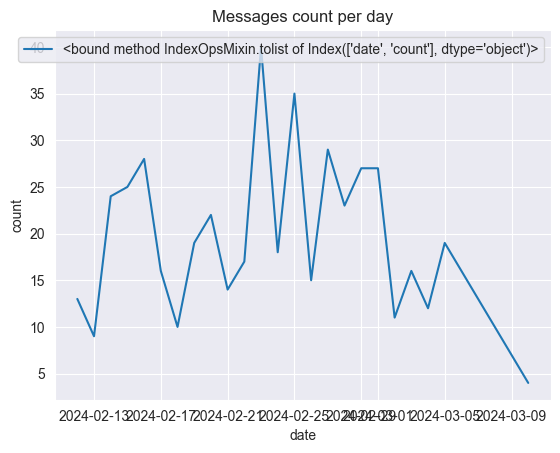

In [12]:
### Posted posts at day

# Message Engagement Trends Over Time
# Dynamic variables: included_columns, is_group_by_date
messages_df = db_telegram_loader.get_messages_df_by_channel_id(current_channel_id)[:-most_recent_messages_split]

messages_df = messages_df.groupby(['date'])['id'].count().reset_index()
messages_df.rename({'id': 'count'}, axis=1, inplace=True)

sns.lineplot(x=messages_df['date'], y=messages_df['count'], label=messages_df.columns.to_list )

plt.xlabel('date')
plt.ylabel('count')
plt.title('Messages count per day')

plt.legend()
plt.show()


In [ ]:
[[v1, v2] for v1, v2 in zip([1],[1])]

{'🔥', '👀', '😁', '❤', '😢', '🤬'}


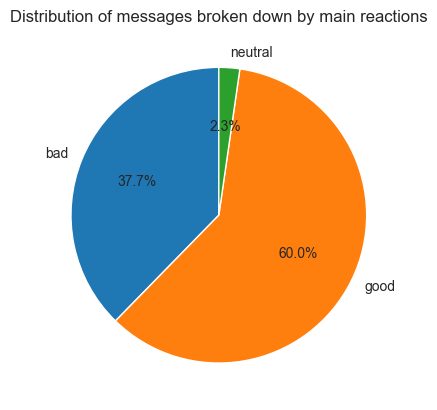

In [34]:
# Emojis
# Dynamic variables: categories
emojis_df = db_telegram_loader.get_all_emojis_reactions_in_channel(current_channel_id)
print(emojis_df)
categories = {}#{'good': ['❤', '👍', '🔥', '😁'], 'bad': ['👎','🤬', '😢'], 'neutral': ['👀']}

if not emojis_groups_names and not emojis_groups_dropdowns:
    emojis_groups_dropdowns = self.all_emojis_options
    emojis_groups_names = ["ALL"]

messages_df = db_telegram_loader.get_messages_df_by_channel_id(current_channel_id)[:-most_recent_messages_split]

messages_df['category'] = messages_df['main_emoji_reaction'].map({v: k for k, values in categories.items() for v in values})

grouped_by_categories_df = messages_df.groupby(['category'])['id'].count().reset_index()
categories_count = grouped_by_categories_df['id']
labels = grouped_by_categories_df['category']

plt.pie(categories_count, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of messages broken down by main reactions')

plt.show()


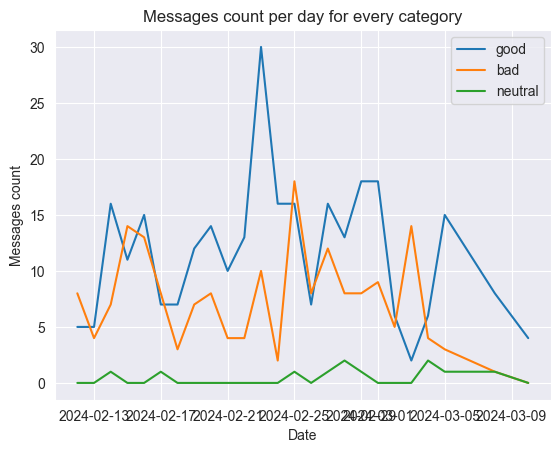

In [35]:
messages_df = messages_df.groupby(['date', 'category'])['id'].count().reset_index()
messages_df.rename({'id': 'count'}, axis=1, inplace=True)

dates = messages_df['date'].unique()
data = {category: [0] * len(dates) for category in categories.keys()}
new_df = pd.DataFrame({'date': dates, **data})

for date in list(dates):
    current_date_messages = messages_df[messages_df['date'] == date]
    for category in categories.keys():
        current_category_messages = current_date_messages[current_date_messages['category'] == category]
        if not current_category_messages.empty:
            new_df.loc[new_df['date'] == date, category] = current_category_messages['count'].values[0]

for category in categories.keys():
    sns.lineplot(x=new_df['date'], y=new_df[category], label=category)

plt.xlabel('Date')
plt.ylabel('Messages count')
plt.title('Messages count per day for every category')

plt.legend()
plt.show()

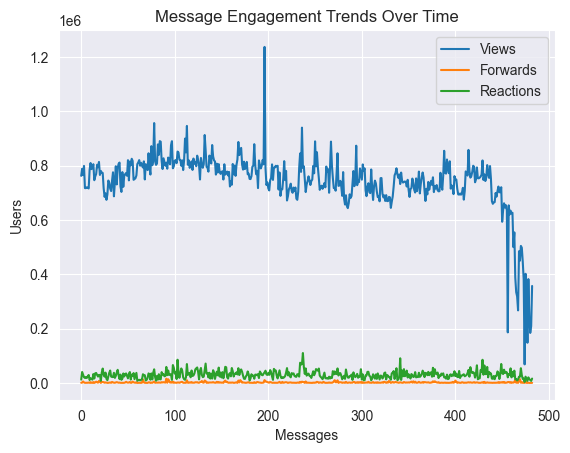

In [10]:
included_columns = {'views': 'Views', 'forwards': 'Forwards', 'reactions': 'Reactions'}
x = range(len(messages_df))

is_group_by_date = False

if is_group_by_date:
    messages_df = messages_df.groupby(['date'])[list(included_columns.keys())].sum().reset_index()
    x = messages_df['date']

for k, v in included_columns.items():
    sns.lineplot(x=x, y=messages_df[k], label=v)

plt.xlabel('Messages')
plt.ylabel('Users')
plt.title('Message Engagement Trends Over Time')

plt.legend()
plt.show()

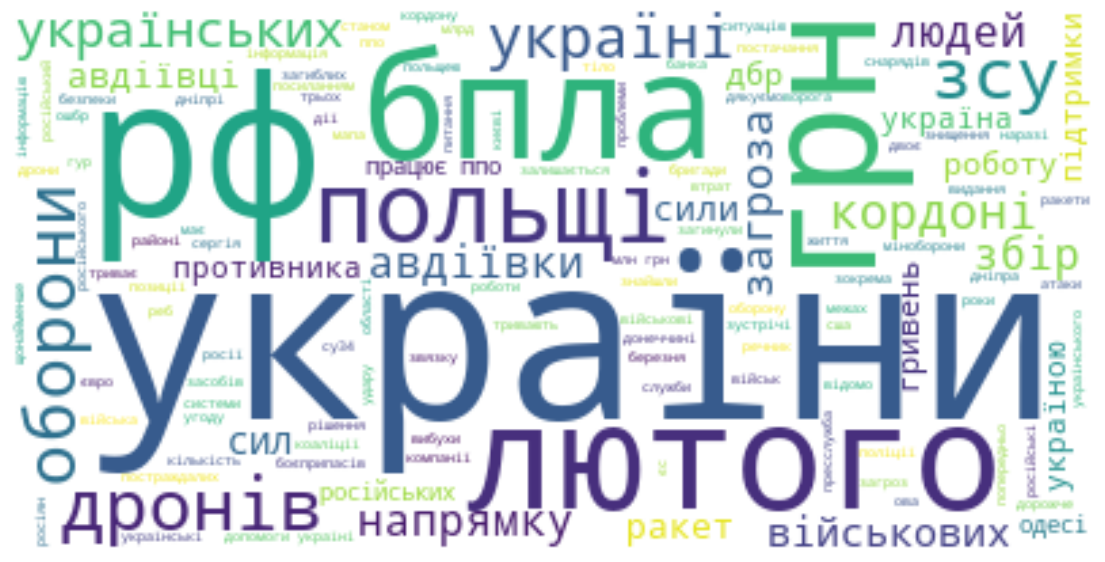

In [13]:
import re
import string

### Stop words ###

needed_languages = ['english', 'ukrainian']

all_stopwords = []

def custom_stopwords(language):
    files_paths = {'ukrainian': '../../data/additional/stopwords_ua.txt'}
    stopwords = pd.read_csv(files_paths[language], header=None, names=['words'])
    return list(stopwords.words)

nltk_languages = stopwords.fileids()
custom_stopwords_languages = ['ukrainian']

for lang in needed_languages:
    if lang in nltk_languages:
        all_stopwords.extend(stopwords.words(lang))
    elif lang in custom_stopwords_languages:
        all_stopwords.extend(custom_stopwords(lang))

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    test_words = [word for word in tokens if word not in all_stopwords]
    return ' '.join(test_words).strip()

################

messages_df = db_telegram_loader.get_messages_df_by_channel_id(current_channel_id)[:-most_recent_messages_split]
# remove stopwords
messages_df['message_nostop'] = messages_df['message'].apply(lambda x: clean_text(x.lower()))
all_words = "".join(messages_df['message_nostop'].tolist())

wordcloud = WordCloud(background_color='white').generate(all_words)

# display the cloud
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
